In [23]:
import matplotlib.pyplot as plt

path = "images_processed_2/lungs/"
filenames = ["No_1291_1227_0.png",
             "CO_169_208_1.png",
             "Pn_2042_187_1.png",
             "No_1270_1204_1.png",
             "CO_112_143_1.png",
             "Pn_3403_413_0.png",]

images = []
for filename in filenames:
    images.append(plt.imread(path + filename))
    
    

In [52]:
import numpy as np
from scipy.fftpack import dct, idct
from PIL import Image
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

# Initialize empty arrays to hold blocks of data

i1 = []; i2 = []; i3 = []; i4 = []; i5 = []

for imgi in range(len(images)):

    blocks = []; blocks_dct = []; blocks_dctr = []; blocks_idct = []

    image = images[imgi]
    # Iterate through rows and columns
    for i in range(4):
        for j in range(2):

            # Select current block
            image = rgb2gray(image)
            block = image[round(i*image.shape[0]/4):round((i+1)*image.shape[0]/4), round(j*image.shape[1]/2):round((j+1)*image.shape[1]/2)]
            block_dct = dct(dct(block, axis=0),  axis=1)
            flatblock = block_dct.flatten()
            level_25th = np.argsort(abs(flatblock))[::-1][100:] #64 = 25% of 256 (16 by 16)

            new_block = np.zeros(flatblock.shape)
            new_block[level_25th] = flatblock[level_25th]
            reshaped = new_block.reshape(np.shape(block_dct))

            block_rebuilt = idct(idct(reshaped, axis=0), axis=1)

            blocks.append(block)
            blocks_dct.append(block_dct)
            blocks_dctr.append(reshaped)
            blocks_idct.append(block_rebuilt)

    # Initializing Viewing Arrays
    image_out = np.full((800, 350), 1.0)
    image_dct = np.full((800, 350), 0)
    image_dctr = np.full((800, 350), 0)
    image_idct = np.full((800, 350), 1.0)

    # Load data into viewing output image arrays
    for i in range(4):
        for j in range(2):
            ind = 2*i + j

            image_out[round(i*image.shape[0]/4):round((i+1)*image.shape[0]/4), 
                      round(j*image.shape[1]/2):round((j+1)*image.shape[1]/2)] = blocks[ind]
            # Log scale included for display
            image_dct[round(i*image.shape[0]/4):round((i+1)*image.shape[0]/4), 
                      round(j*image.shape[1]/2):round((j+1)*image.shape[1]/2)] = np.log(abs(blocks_dct[ind]) + 0.1)
            image_dctr[round(i*image.shape[0]/4):round((i+1)*image.shape[0]/4), 
                      round(j*image.shape[1]/2):round((j+1)*image.shape[1]/2)] = np.log(abs(blocks_dctr[ind]) + 0.1)
            image_idct[round(i*image.shape[0]/4):round((i+1)*image.shape[0]/4), 
                      round(j*image.shape[1]/2):round((j+1)*image.shape[1]/2)] = blocks_idct[ind]

    image_idct = np.round(256*image_idct/image_idct.max())
    image = np.round(256*image/image.max())
    diff = abs(image - image_idct)
    i1.append(image_out)
    i2.append(image_dct)
    i3.append(image_dctr)
    i4.append(image_idct)
    i5.append(diff)

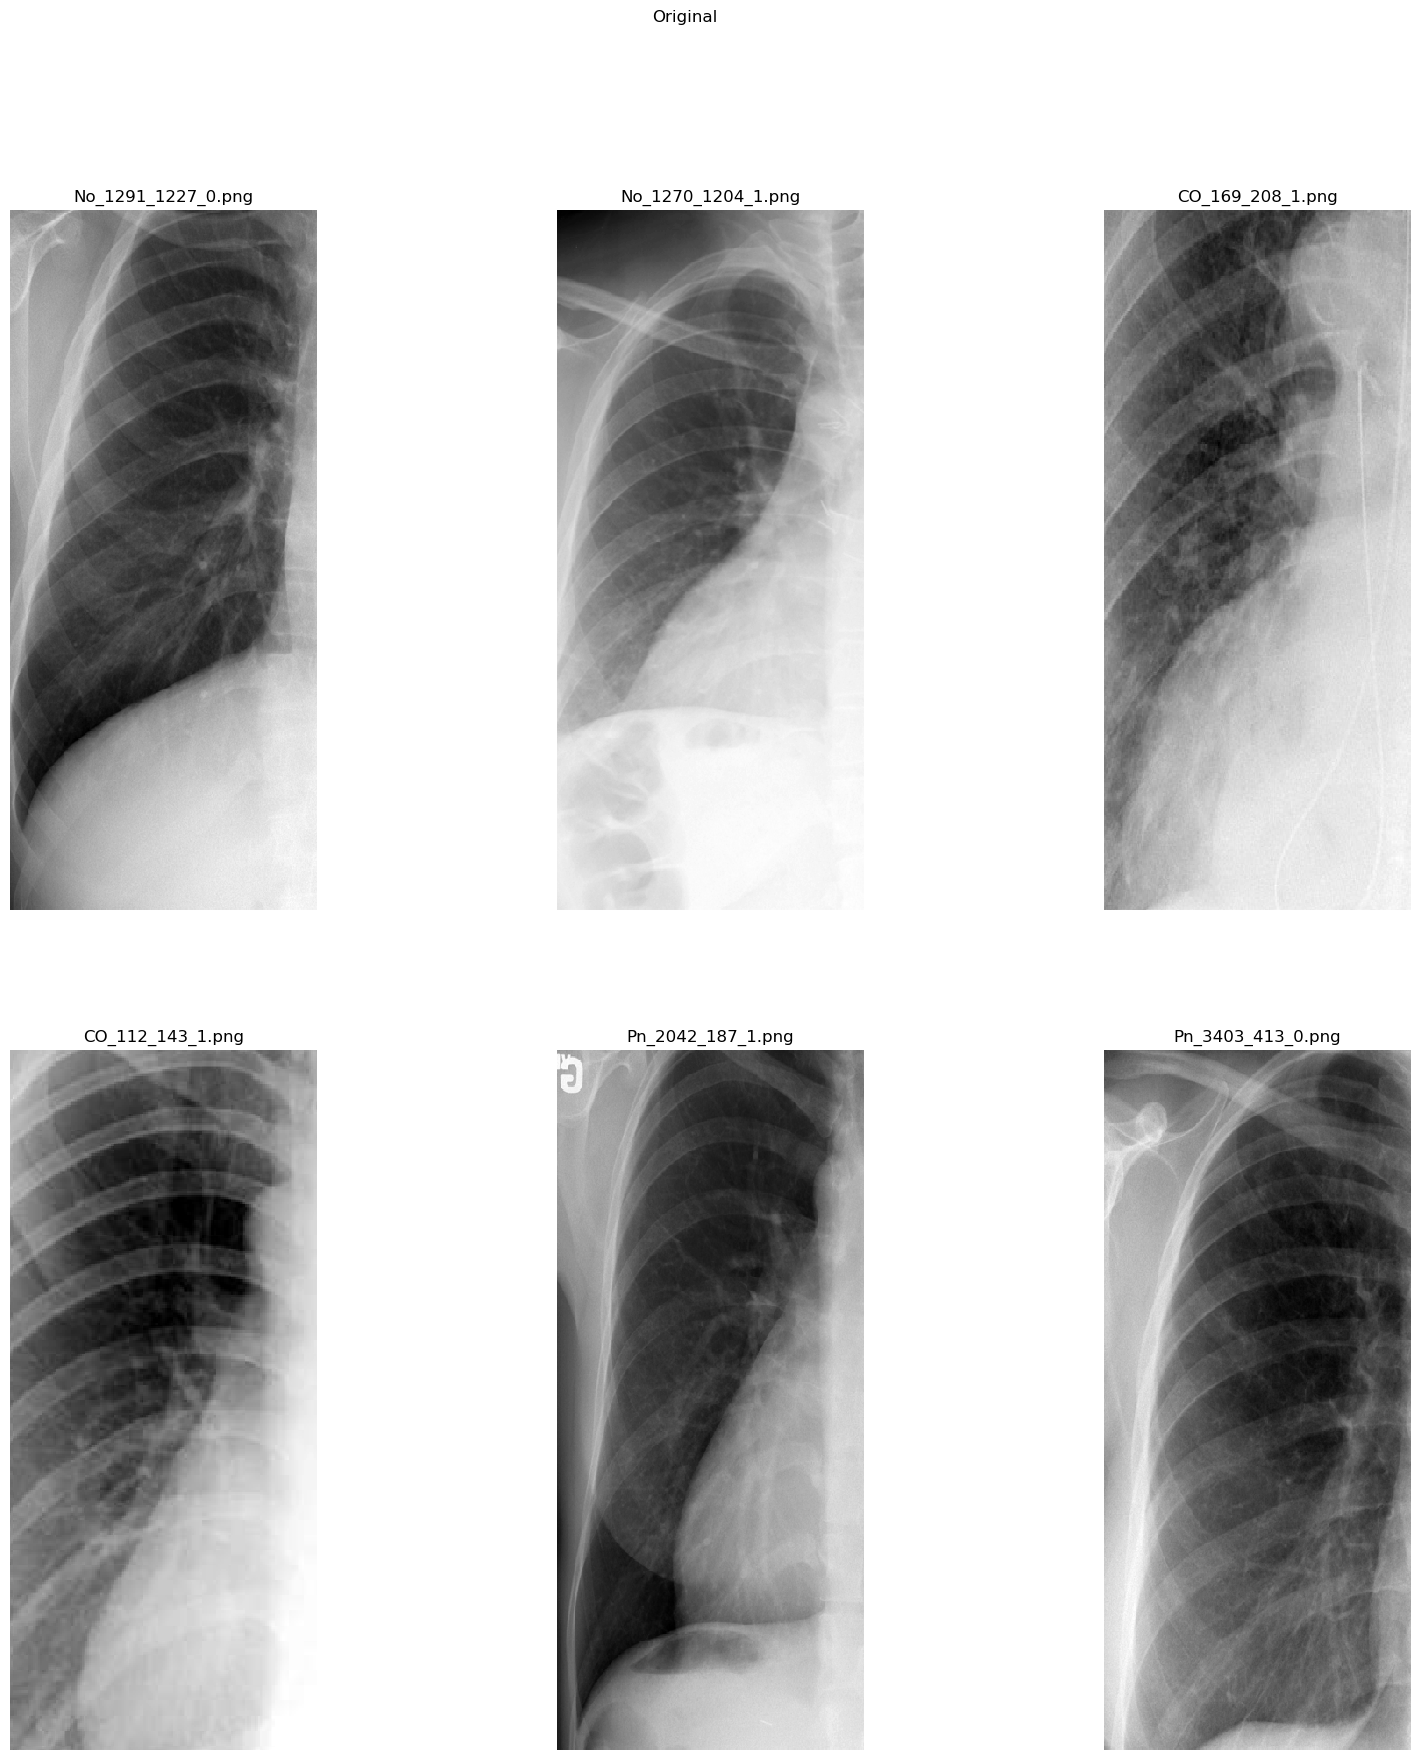

In [53]:
# Display Plots
plt.figure(figsize=(20,20))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(i1[i], cmap = 'gray')
    plt.title(filenames[i])
    plt.axis(False)
fig = plt.gcf()
fig.suptitle("Original")
plt.show()

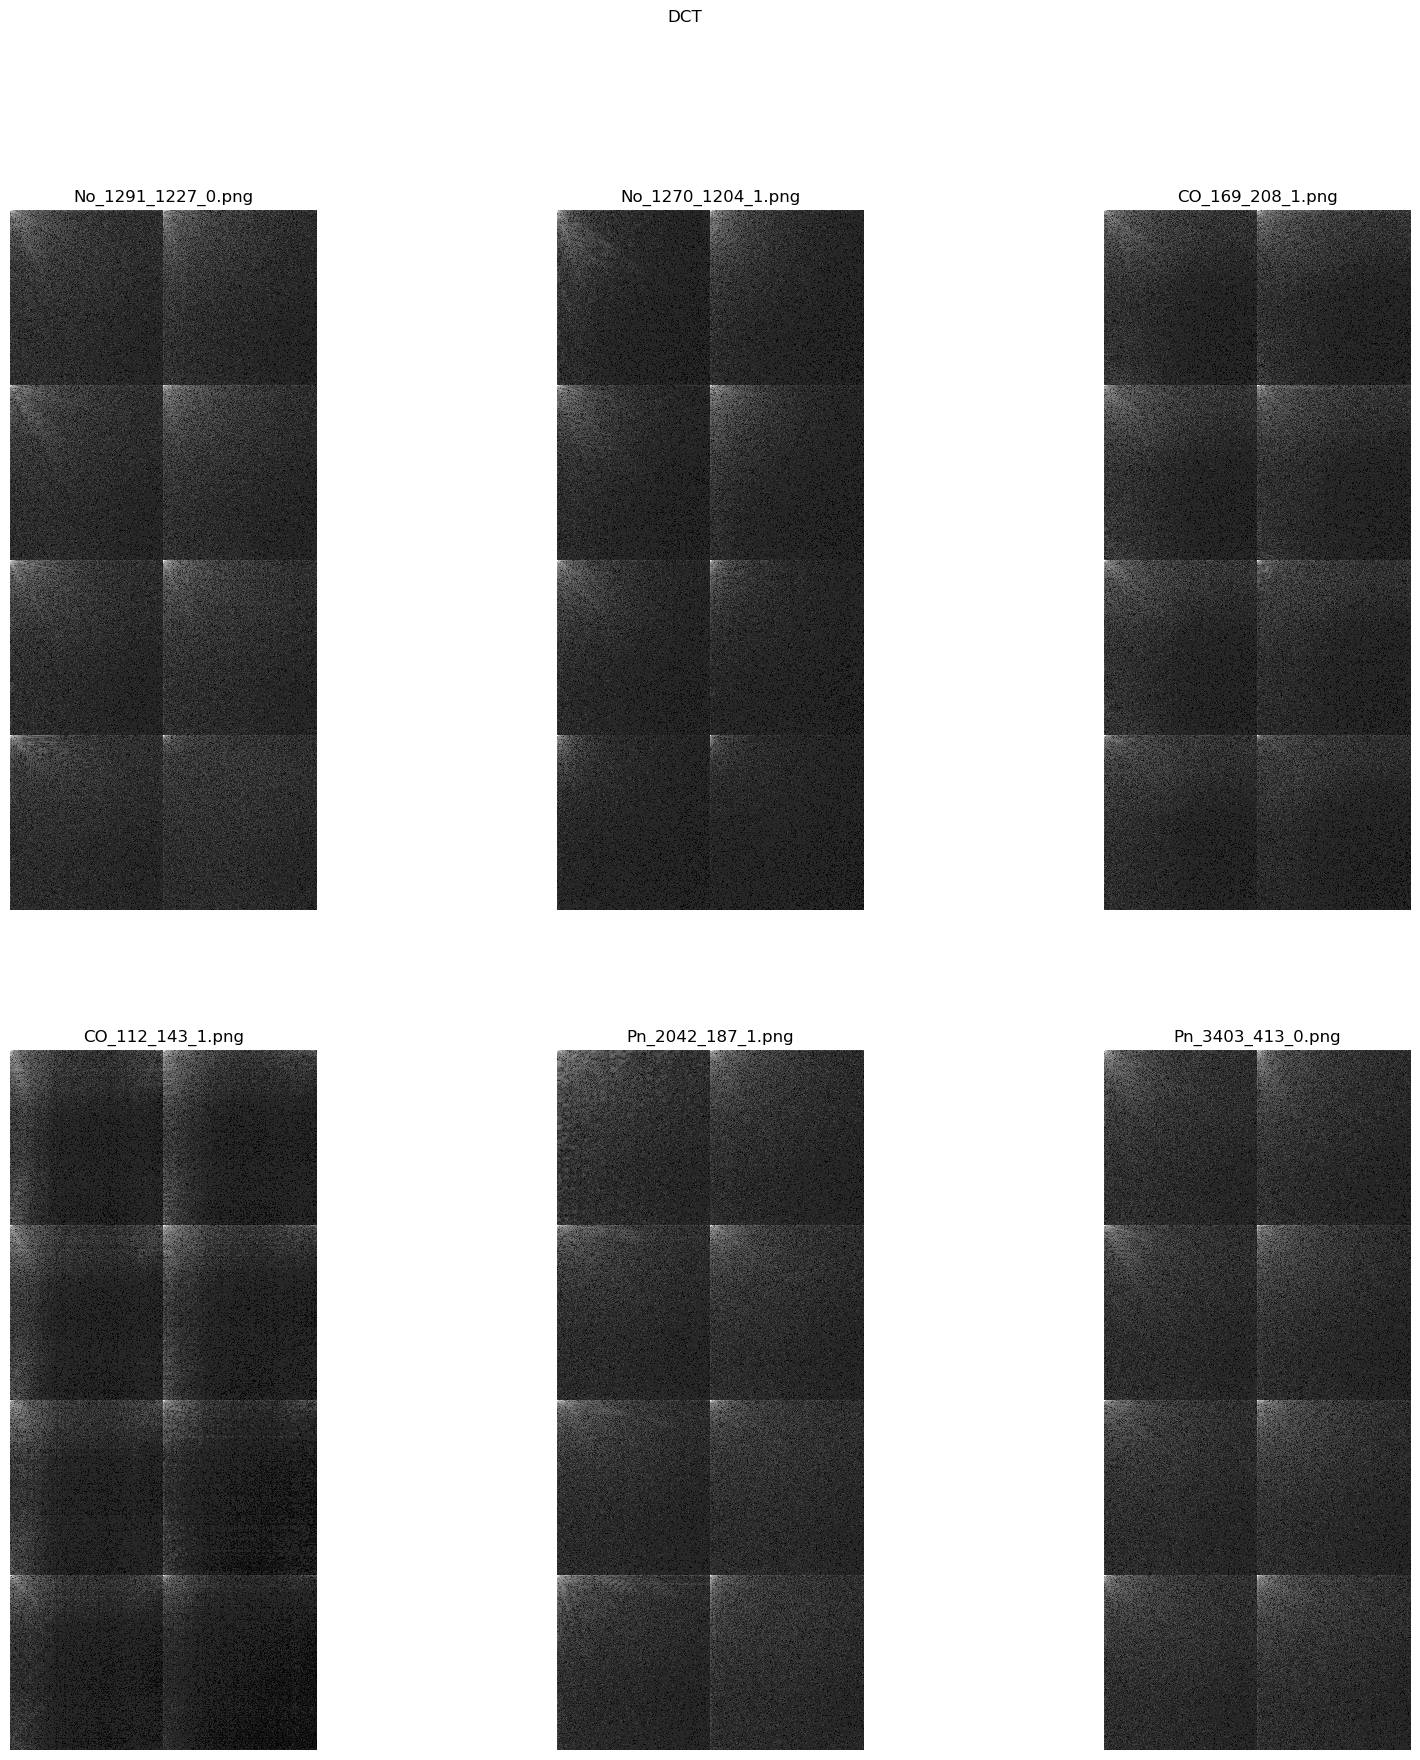

In [54]:
# Display Plots
plt.figure(figsize=(20,20))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(i2[i], cmap = 'gray')
    plt.title(filenames[i])
    plt.axis(False)
fig = plt.gcf()
fig.suptitle("DCT")
plt.show()

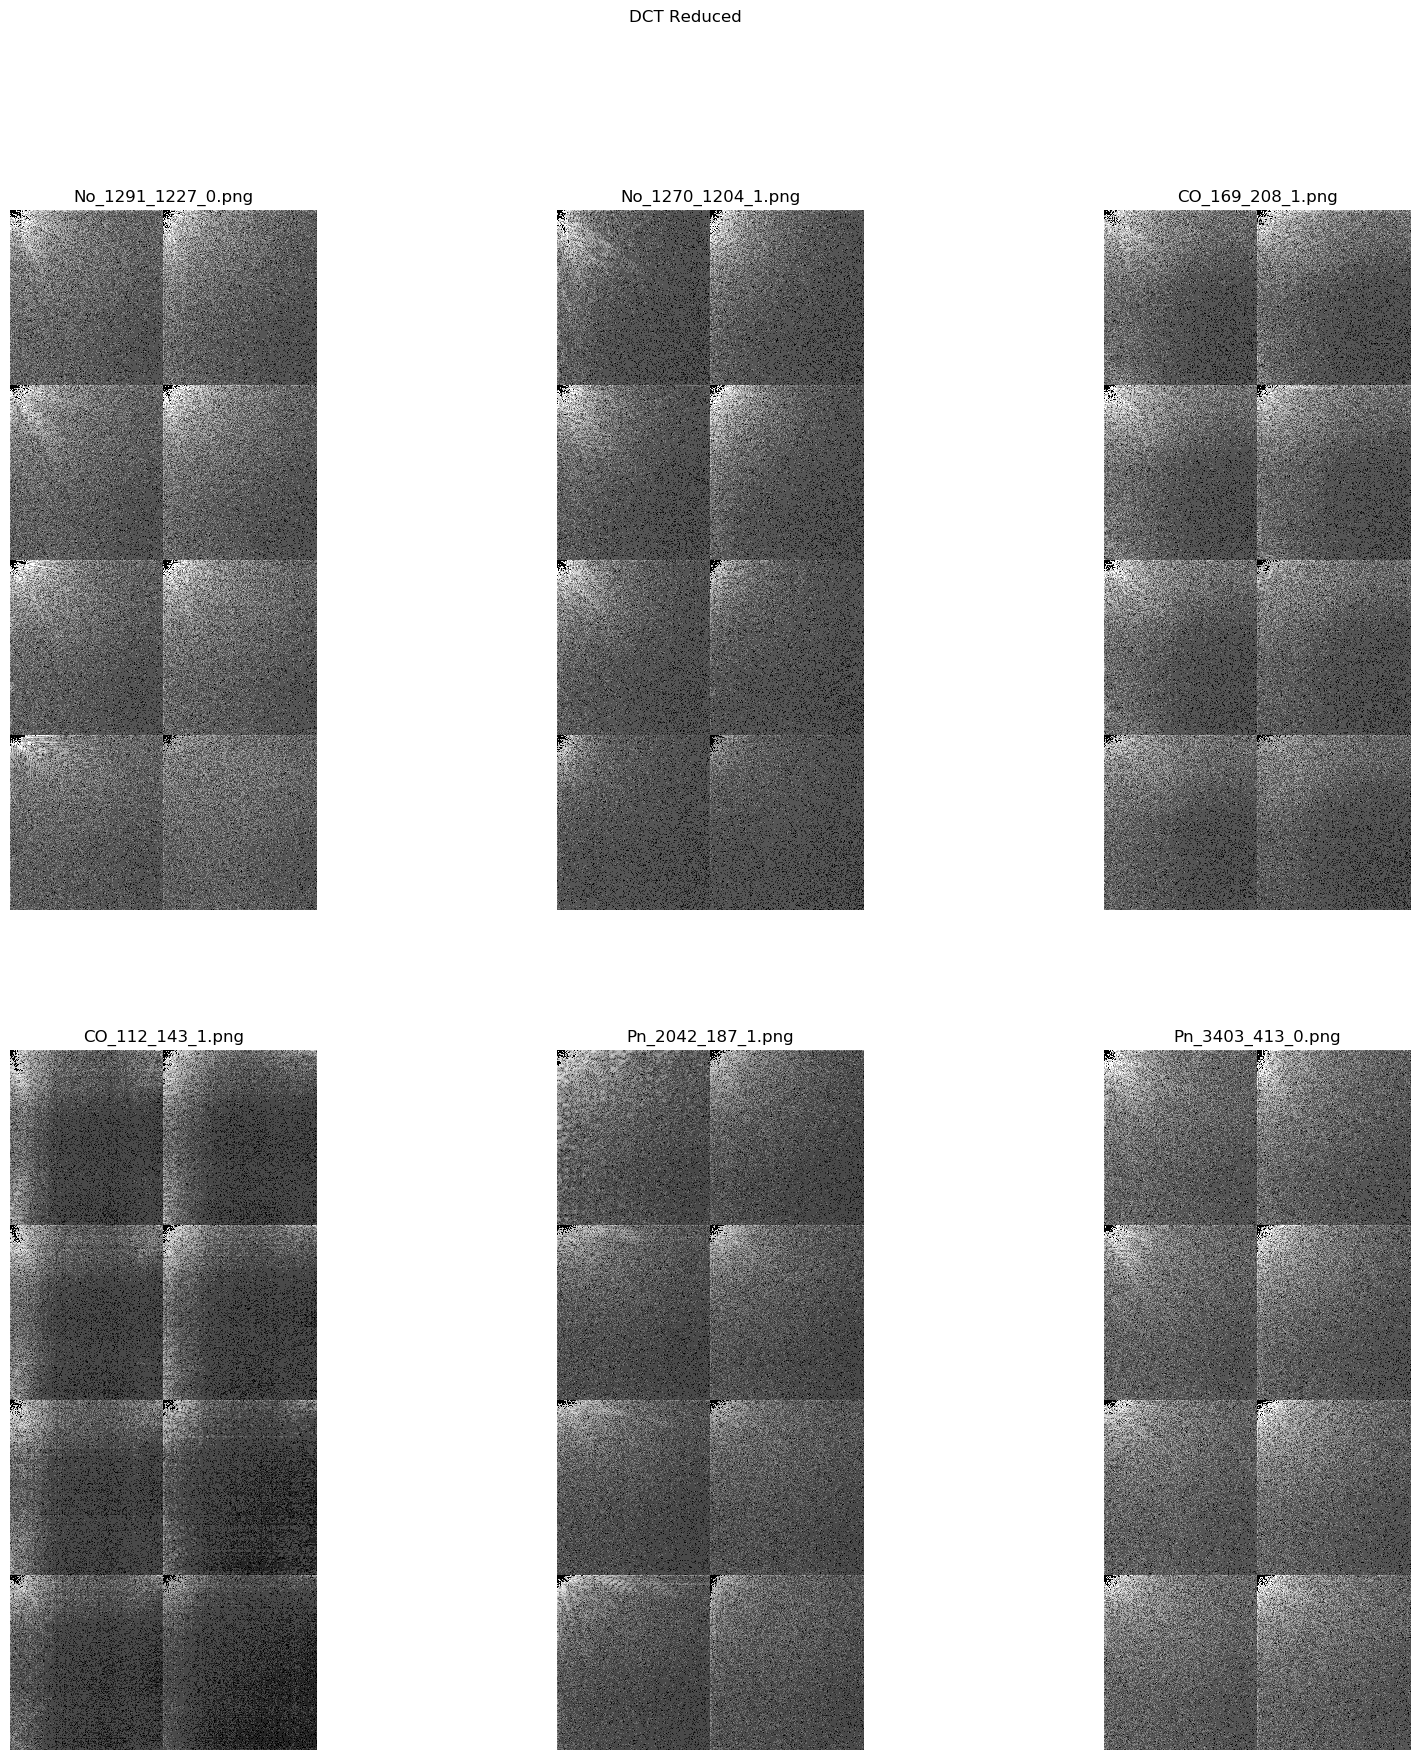

In [55]:
# Display Plots
plt.figure(figsize=(20,20))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(i3[i], cmap = 'gray')
    plt.title(filenames[i])
    plt.axis(False)
fig = plt.gcf()
fig.suptitle("DCT Reduced")
plt.show()

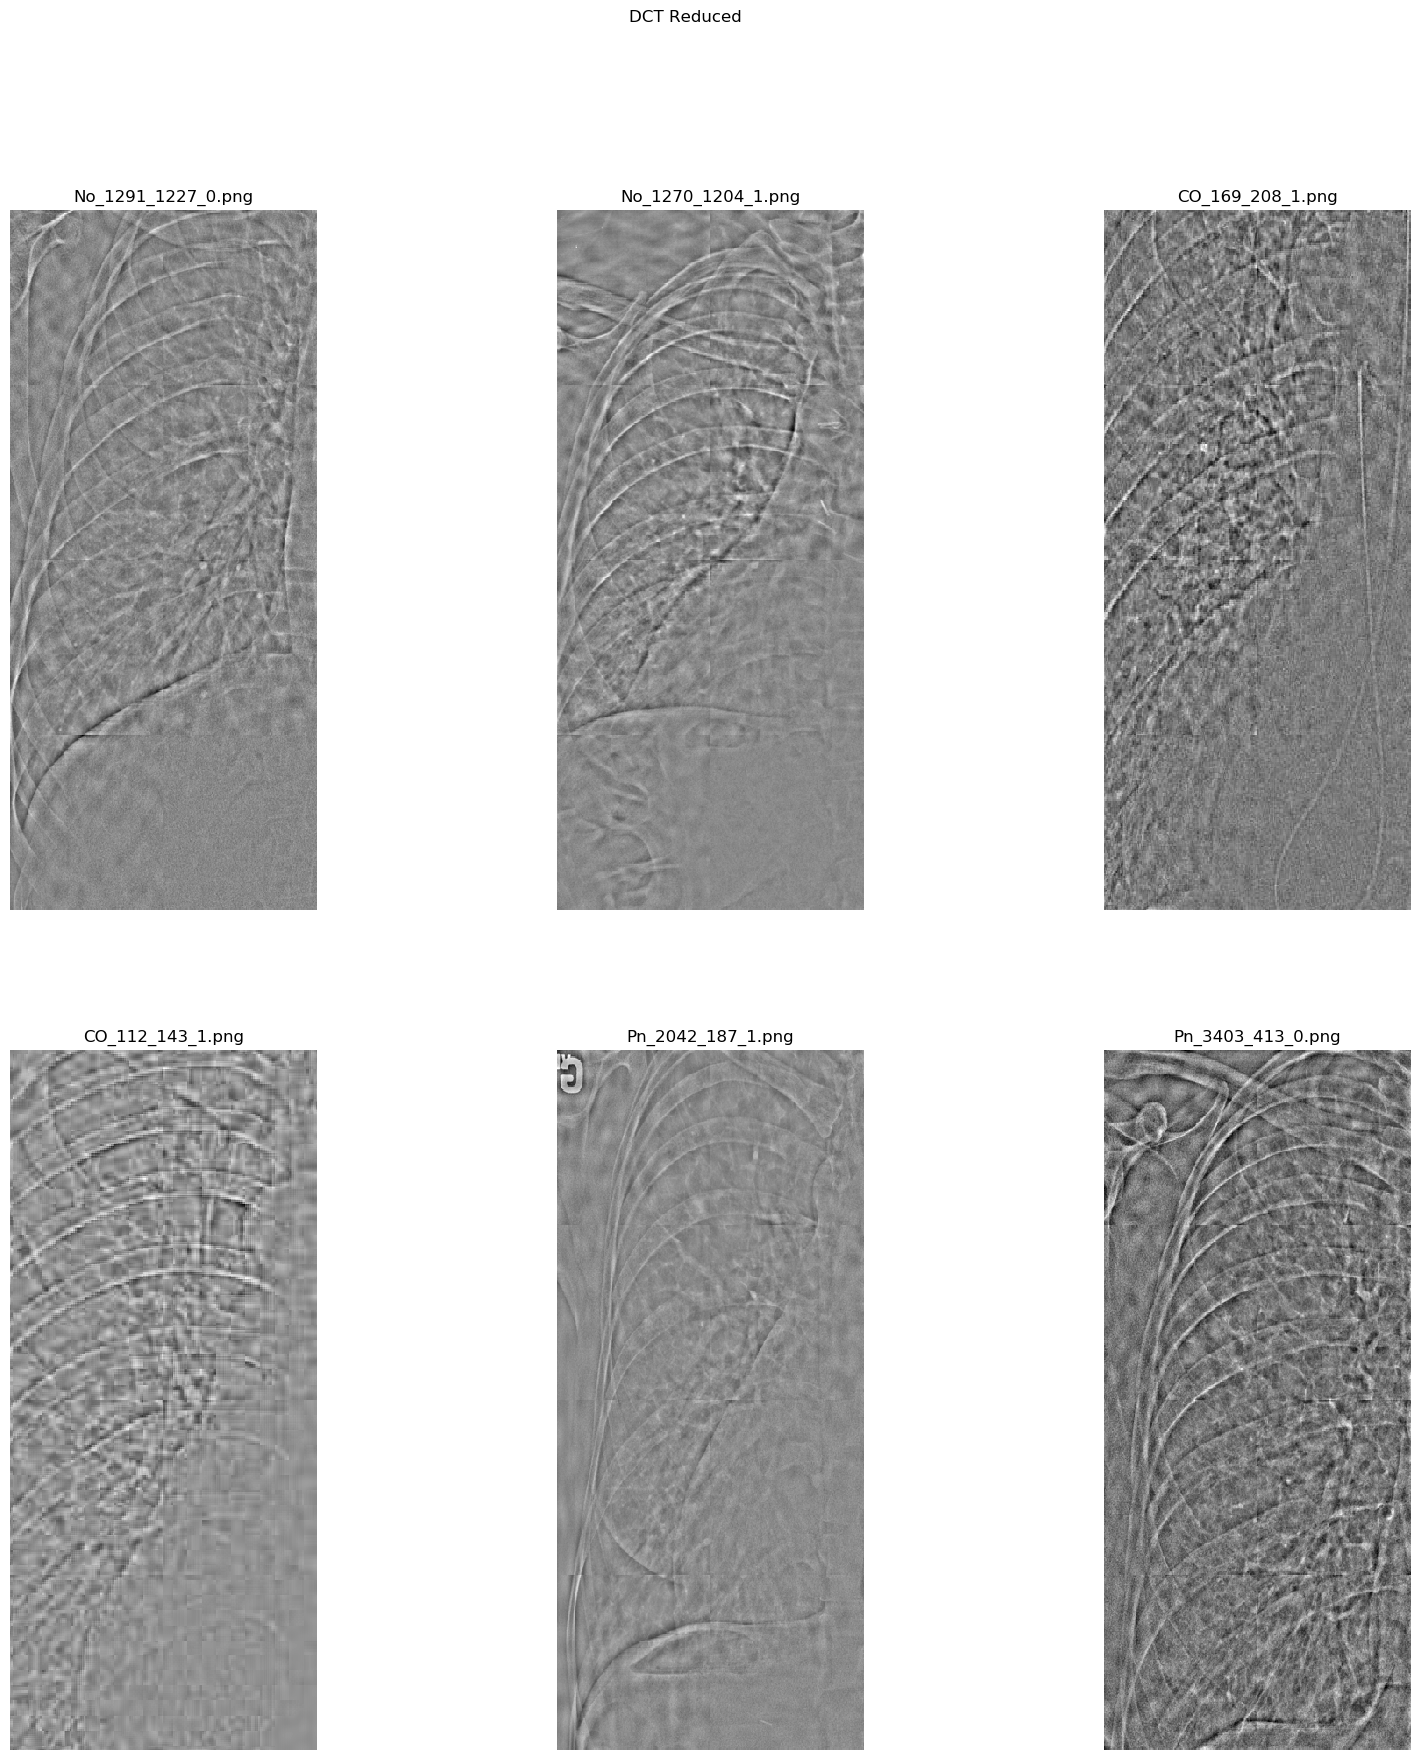

In [67]:
# Display Plots
plt.figure(figsize=(20,20))
for i in range(6):
    plt.subplot(2, 3, i+1)
    i4[i] = np.round(256*(i4[i] - np.min(i4[i]))/(np.max(i4[i])-np.min(i4[i])))
    plt.imshow(i4[i], cmap = 'gray')
    plt.title(filenames[i])
    plt.axis(False)
fig = plt.gcf()
fig.suptitle("DCT Reduced")
plt.show()

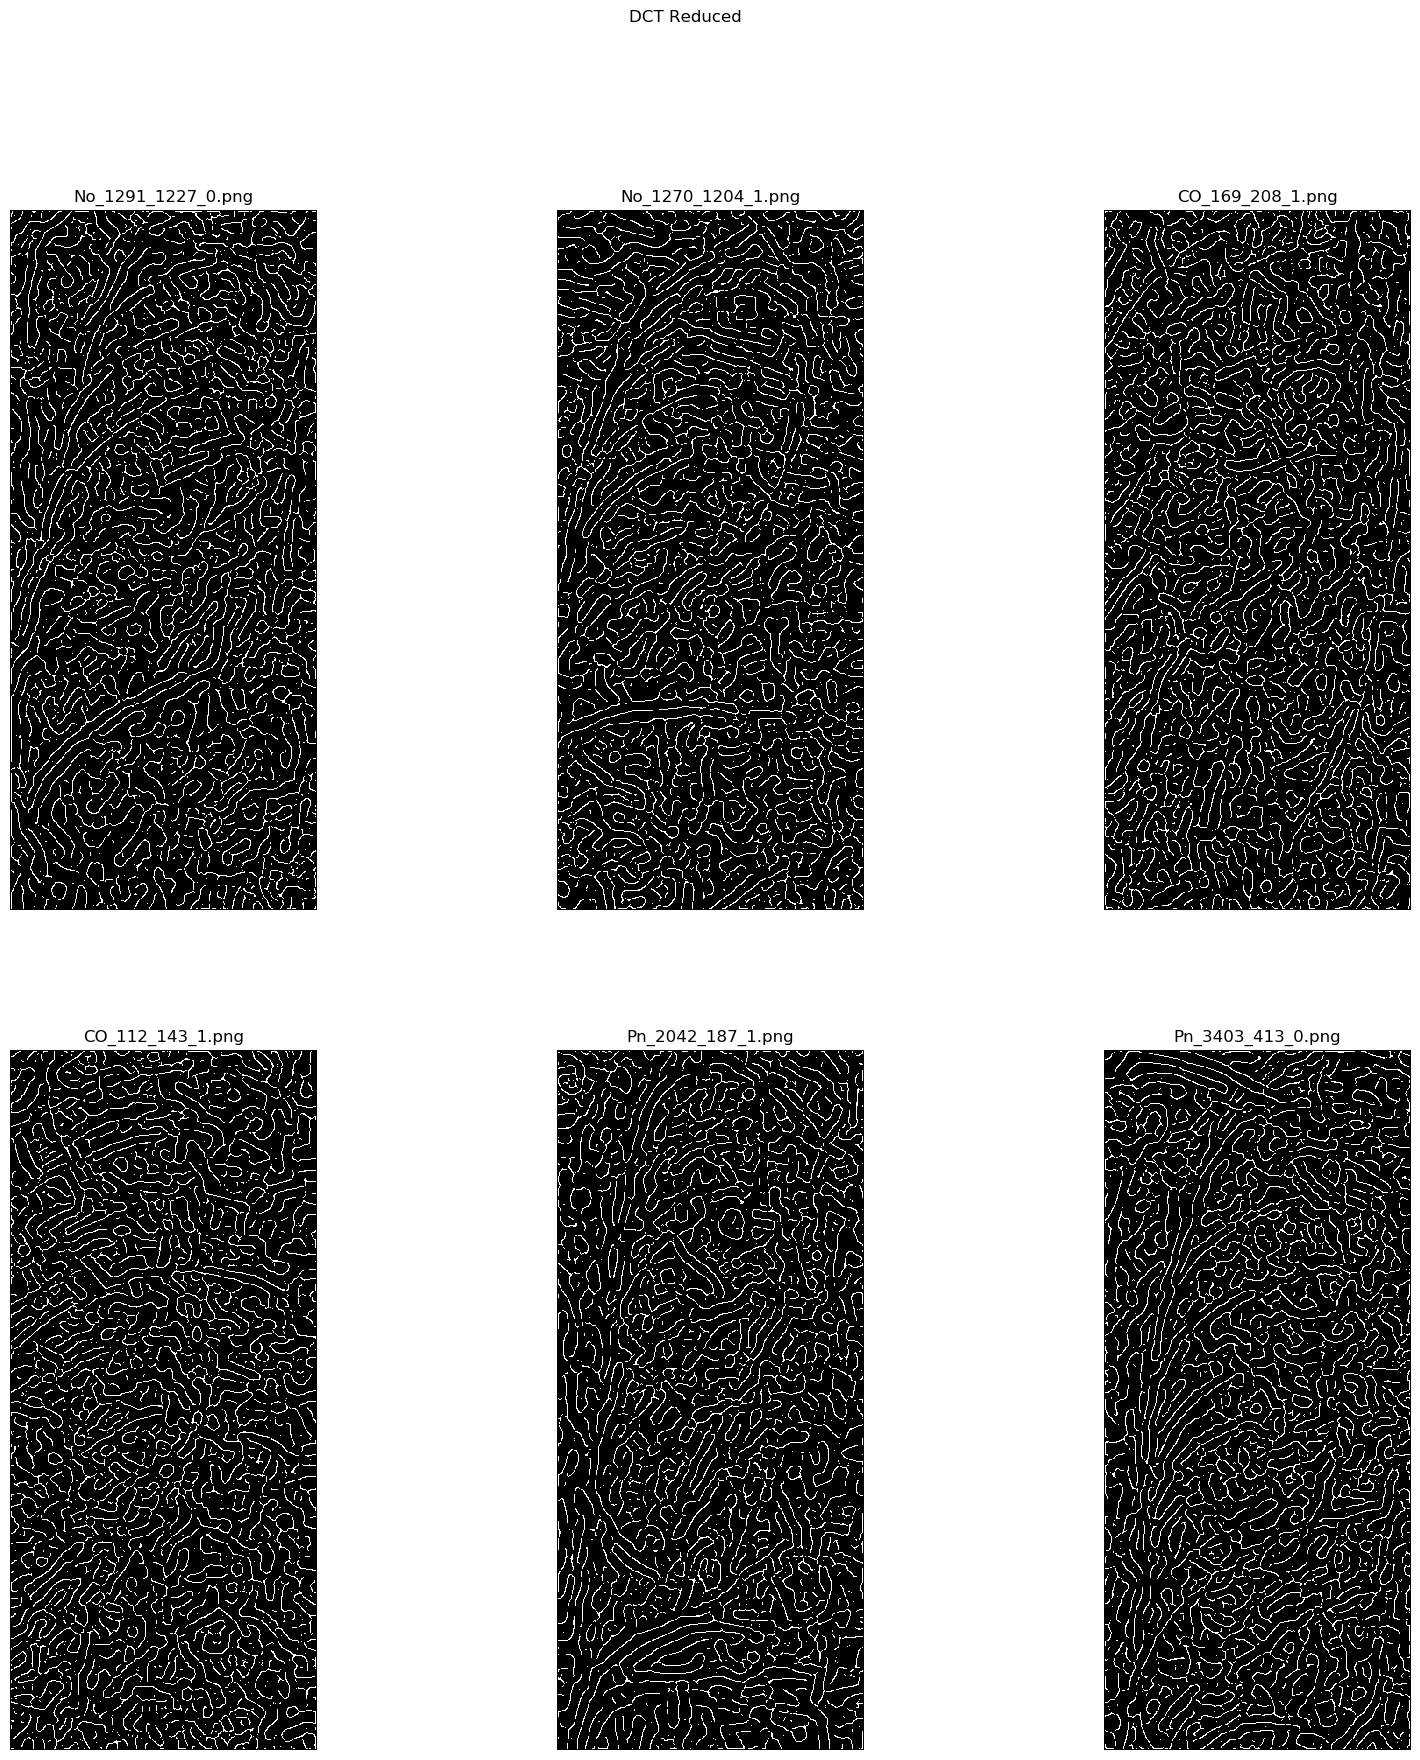

In [76]:
from skimage.filters import sobel, prewitt
from skimage import feature
from skimage.color import rgb2gray

# Display Plots
plt.figure(figsize=(20,20))
for i in range(6):
    plt.subplot(2, 3, i+1)
    i4[i] = np.round(256*(i4[i] - np.min(i4[i]))/(np.max(i4[i])-np.min(i4[i])))
    img_canny = feature.canny(i4[i], sigma = 5)
    img_sobel = sobel(i4[i])
    plt.imshow(img_canny, cmap = 'gray')
    plt.title(filenames[i])
    plt.axis(False)
fig = plt.gcf()
fig.suptitle("DCT Reduced")
plt.show()


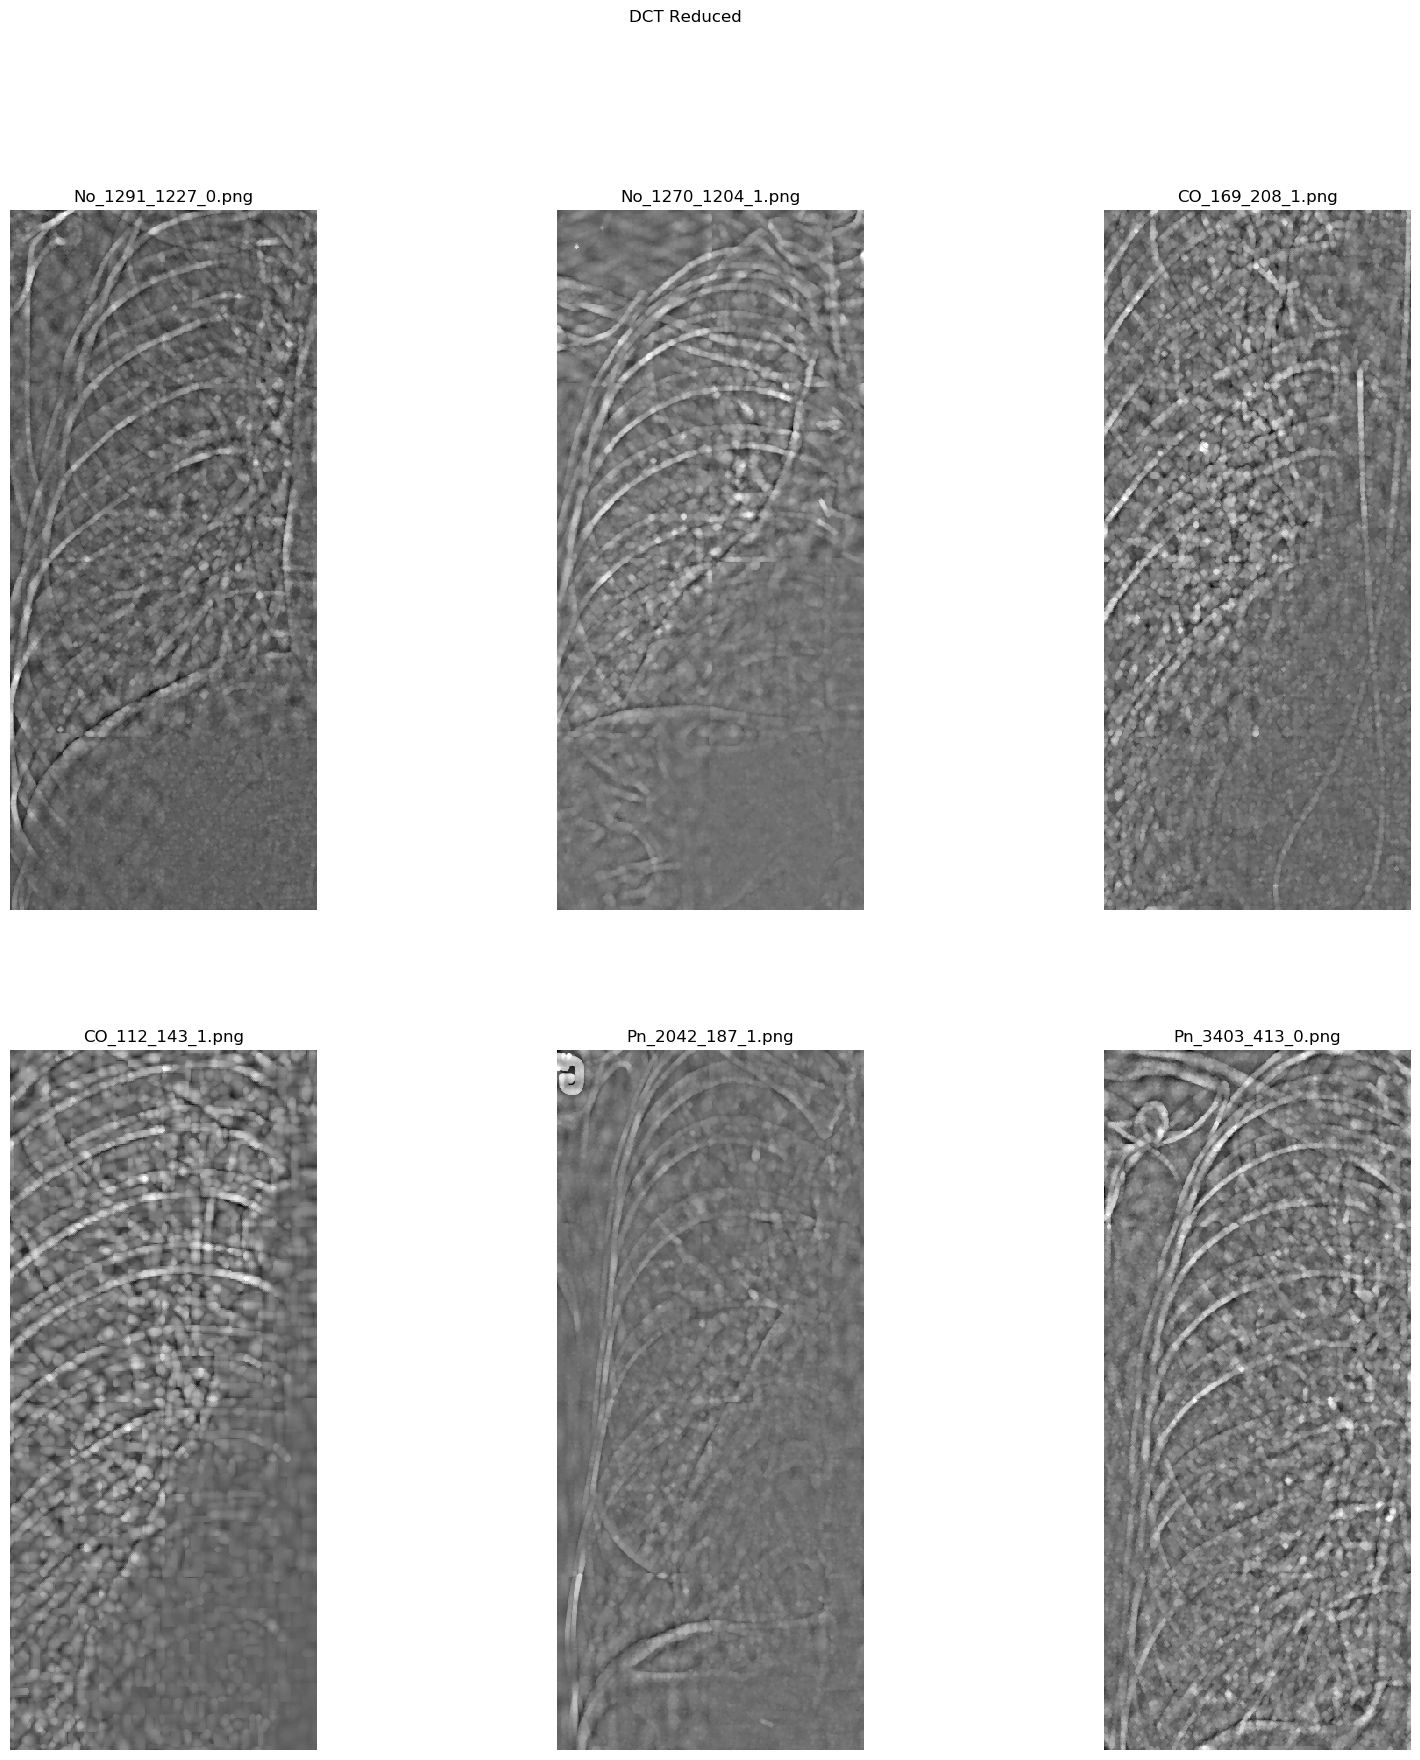

In [88]:
from skimage.filters import sobel, prewitt
from skimage import feature
from skimage.color import rgb2gray
import cv2

    

# Display Plots
plt.figure(figsize=(20,20))
for i in range(6):
    plt.subplot(2, 3, i+1)
    i4[i] = np.round(256*(i4[i] - np.min(i4[i]))/(np.max(i4[i])-np.min(i4[i])))
    kernel = np.array([[0, 0, 1, 0, 0], [0, 1, 1, 1, 0], [1, 1, 1, 1, 1], [0, 1, 1, 1, 0], [0, 0, 1, 0, 0]], np.uint8)
    erosion = cv2.dilate(i4[i], kernel, iterations = 1)
    erosionEdge = feature.canny(erosion, sigma = 3)
    plt.imshow(erosion, cmap = 'gray')
    plt.title(filenames[i])
    plt.axis(False)
fig = plt.gcf()
fig.suptitle("DCT Reduced")
plt.show()

In [51]:
path = "images_processed_2/lungs/"
filenames = ["No_1291_1227_0.png",
             "No_1270_1204_1.png",
             "CO_169_208_1.png",
             "CO_112_143_1.png",
             "Pn_2042_187_1.png",
             "Pn_3403_413_0.png",]

images = []
for filename in filenames:
    images.append(plt.imread(path + filename))
    

import matplotlib.pyplot as plt
from skimage.feature import greycomatrix, greycoprops

# Develop list of properties to extract from GLCM output
properties = ["contrast", "homogeneity", "energy", "correlation"]
plt.style.use('default')

# Initialize angles to be all 8 directions requested in the prompt (all multiples of pi/4)
angles = np.linspace(0, 2*np.pi, 9)

# Create empty array to hold all GLCM data for all textures
glcms = []


for image in images:
    image = np.round((256*rgb2gray(image)).astype('uint8'))
    # Calculate GLCM for each texture using SKImage
    glcms.append(greycomatrix(image, 
                             distances=[1], 
                             angles=angles[:-1], 
                             levels=256, 
                             symmetric=True, 
                             normed=True))

for i in range(6):
    print("Texture " + filenames[i])
    
    # Iterate through properties and print data
    for p in properties:
        print(p + ": " + str(np.mean(greycoprops(glcms[i], p))))
    print("")

Texture No_1291_1227_0.png
contrast: 14.309234960894376
homogeneity: 0.3377563880768398
energy: 0.02387481184020435
correlation: 0.9977127775754222

Texture No_1270_1204_1.png
contrast: 6.138874009199489
homogeneity: 0.49694101027344595
energy: 0.039794126884588034
correlation: 0.9990220481125917

Texture CO_169_208_1.png
contrast: 10.850677962232263
homogeneity: 0.4452839849887118
energy: 0.033630148561233364
correlation: 0.9974515110200044

Texture CO_112_143_1.png
contrast: 17.166970737732697
homogeneity: 0.6012908830308858
energy: 0.03717782990898221
correlation: 0.9981020659715143

Texture Pn_2042_187_1.png
contrast: 15.396467154982158
homogeneity: 0.3484057579008083
energy: 0.023751478281813523
correlation: 0.9978378266869248

Texture Pn_3403_413_0.png
contrast: 13.888607736684271
homogeneity: 0.3313065313803345
energy: 0.02485777685546427
correlation: 0.9964245260319744

